## **CLASSIFICATION MODELS ON VACCINES RELATED DATA**

**By Lorna Gatimu**


 ## **Introduction**

 # 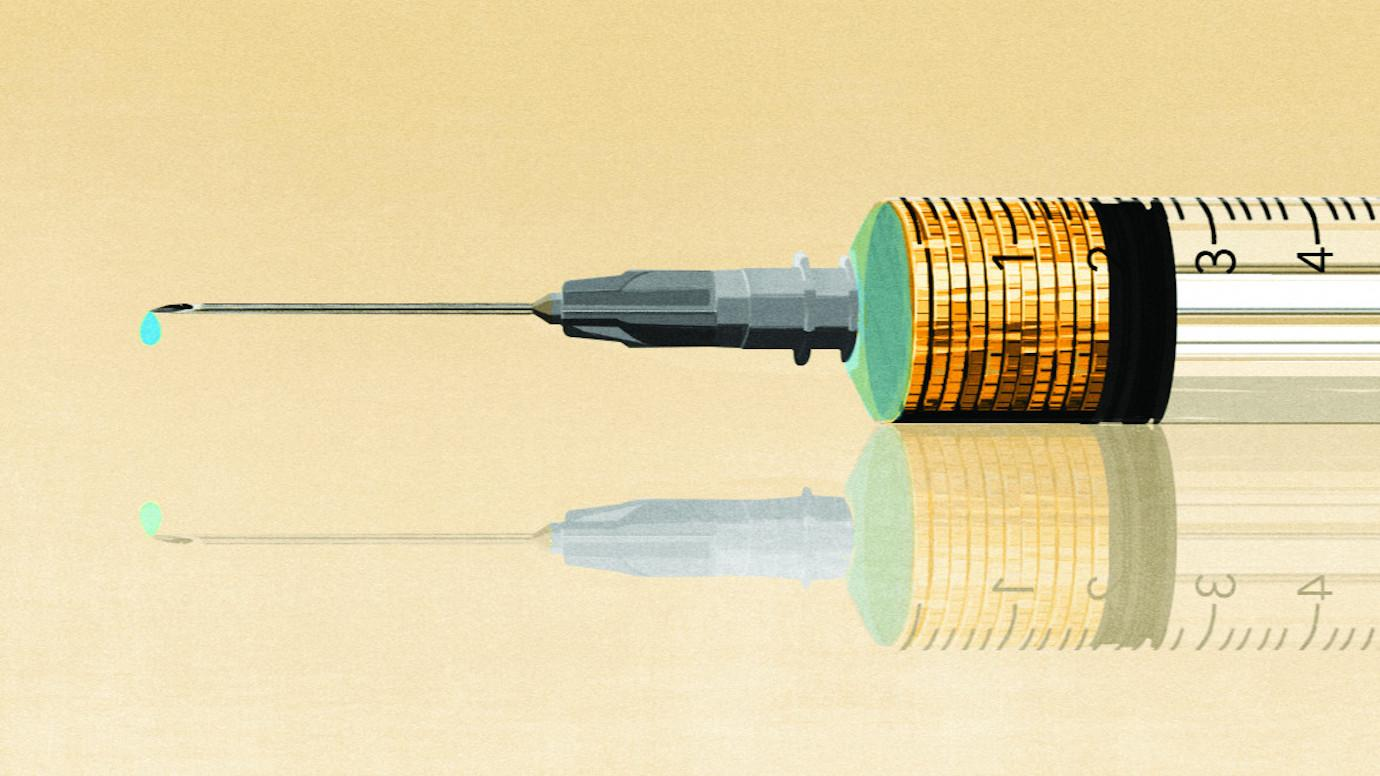

# **Business Understanding**

# Problem Statement
Vaccination plays a huge role in public health especially when it comes to dealing with infectious diseases.Vaccines are very important as they provide immunity against some diseases.
There is however limited information on how various factors affect the acceptance and uptake of a particular vaccine.We will evaluate these factors based on the avilable data.
Gaining a deeper understanding of these influencing factors is crucial for policymakers to design targeted interventions and communication strategies to enhance vaccination coverage. Such insights are also valuable to vaccine manufacturers, enabling them to estimate demand more accurately and optimize production during outbreaks or pandemics.

# Objectives
1. To determine how socioeconomic factors influence an individual's uptake of the seasonal flu vaccines.

2. To determine how behavioral factors influence an individual's uptake of the seasonal flu vaccines.

3. To determine how demographic background factors influence an individual's uptake of the seasonal flu vaccines.

4. To understand how an individual's  knowledge, perception, and attitude towards seasonal flu vaccines influence the uptake of the vaccines.








# **Data Understanding**
Source Data files were obtained from: [DRIVENDATA](https://www.kaggle.com/datasets/soundslikedata/flu-shot-learning)(Source: CDC, NCRID and NCHS (2012), National 2009 H1N1 Flu Survey). This data was colleted over the phone between late 2009 and June 2010

The data labels are described in this [link.](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/#labels)


In [203]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

# Feature selection methods
from sklearn.feature_selection import SelectKBest, chi2

# Data splitting, scaling, and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Evaluation metrics and performance metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score, 
                             precision_score, f1_score, roc_curve, roc_auc_score)

# Dummy classifier for baseline model
from sklearn.dummy import DummyClassifier

# Visualizing missing data
import missingno as msno


In [204]:
# load the datasets
training_set_labels = pd.read_csv(r"C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\training_set_labels.csv")
training_set_features = pd.read_csv(r"C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\training_set_features.csv")
test_set_features = pd.read_csv(r"C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\test_set_features.csv")
submission_format = pd.read_csv(r"C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\submission_format.csv")


In [205]:
print(training_set_features.info)
print(training_set_labels.info)
print(test_set_features.info)
print(submission_format.info)

<bound method DataFrame.info of        respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0

In [206]:
trained_merge = pd.merge(training_set_features,training_set_labels, on = 'respondent_id')
trained_merge.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [207]:
trained_merge.drop(columns=["respondent_id"],inplace=True)

In [208]:
trained_merge.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


# **Data Cleaning**

In [209]:
# checking for duplicates
trained_merge.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
26702    False
26703    False
26704    False
26705    False
26706    False
Length: 26707, dtype: bool

In [210]:
# checking for missing values
missing = trained_merge.isnull().sum().to_frame('missing values')
missing['percentage']=missing ['missing values']/len(trained_merge)

missing_data = missing[missing['percentage']>0]
missing_data

,missing values,percentage
h1n1_concern,92,0.003445
h1n1_knowledge,116,0.004343
behavioral_antiviral_meds,71,0.002658
behavioral_avoidance,208,0.007788
behavioral_face_mask,19,0.000711
behavioral_wash_hands,42,0.001573
behavioral_large_gatherings,87,0.003258
behavioral_outside_home,82,0.003070
behavioral_touch_face,128,0.004793
doctor_recc_h1n1,2160,0.080878


In [211]:
#fill numeric columns with median
trained_merge.fillna(trained_merge.median(),inplace = True)

In [212]:
trained_merge.isnull().sum()

h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [213]:
# replace categorical variables with the word unknown
trained_merge.replace(np.nan,'unknown',inplace = True)

In [214]:
trained_merge.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [215]:
trained_merge.to_csv('cleaned_data.csv',index = False)

In [216]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,unknown,unknown,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,unknown,unknown,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


# **Exploratory Data Analysis**

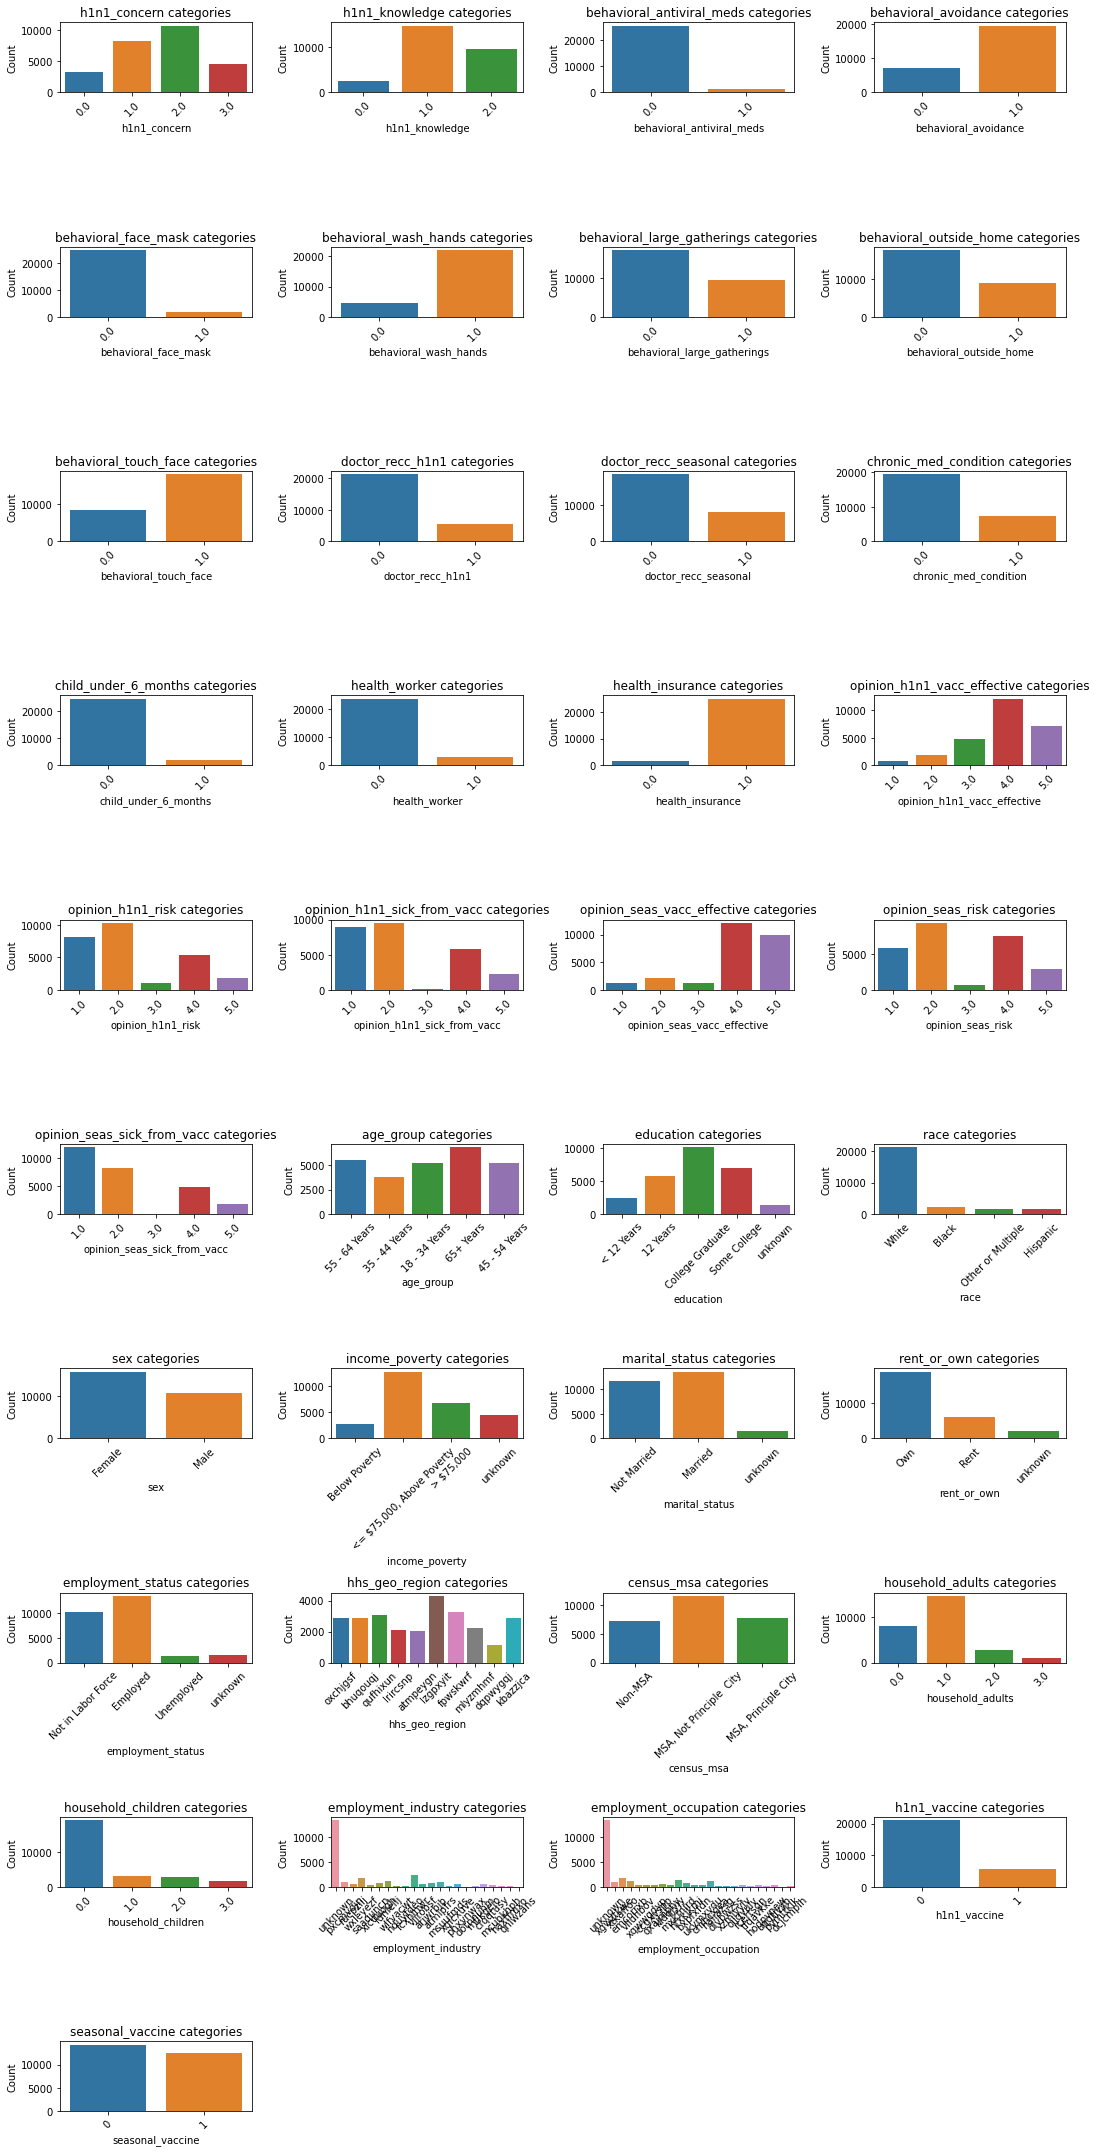

In [217]:
# THIS IS A BIVARIATE ANALYSIS
# Plot Categories
columns = df.columns

# Calculate the number of rows and columns for the subplots
num_rows = (len(columns) + 3) // 4
num_cols = min(len(columns), 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Generate the distribution plots

for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f"{column} categories")
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel("Count")

# Remove any empty subplots
if len(columns) < num_rows * num_cols:
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


For this particular project I shall focus on the seasonal vaccine which will help in understanding and improving public health measures, resource management, and vaccination strategies, which have significant implications for disease prevention and community health.

In [218]:
count = df['seasonal_vaccine'].value_counts()
count

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

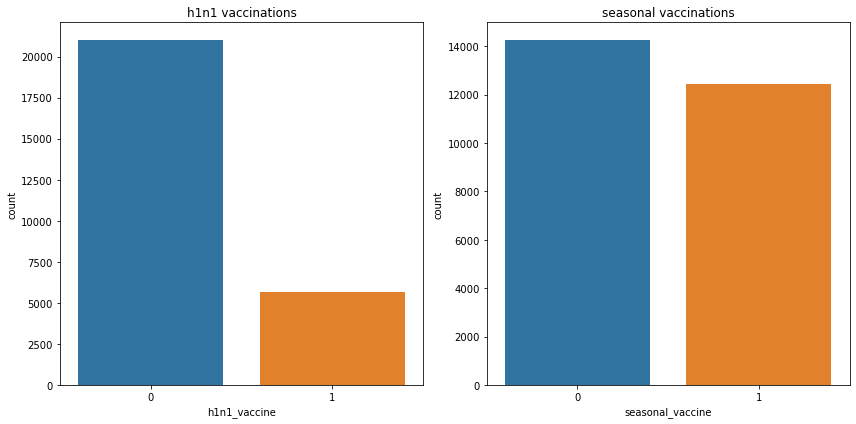

In [219]:
fig, ax = plt.subplots(figsize =(12,6),ncols = 2)
sns.countplot(x ='h1n1_vaccine',data =df,ax=ax[0])
sns.countplot(x ='seasonal_vaccine',data=df,ax=ax[1])
ax[0].set_title('h1n1 vaccinations')
ax[1].set_title('seasonal vaccinations')
plt.tight_layout()
plt.show()

**Class balance**:
 
For the seasonal_vaccine,the two classes have similar counts that are relatively close to each other. Therefore, we can consider the dataset to be fairly balanced compared to the h1n1_vaccine

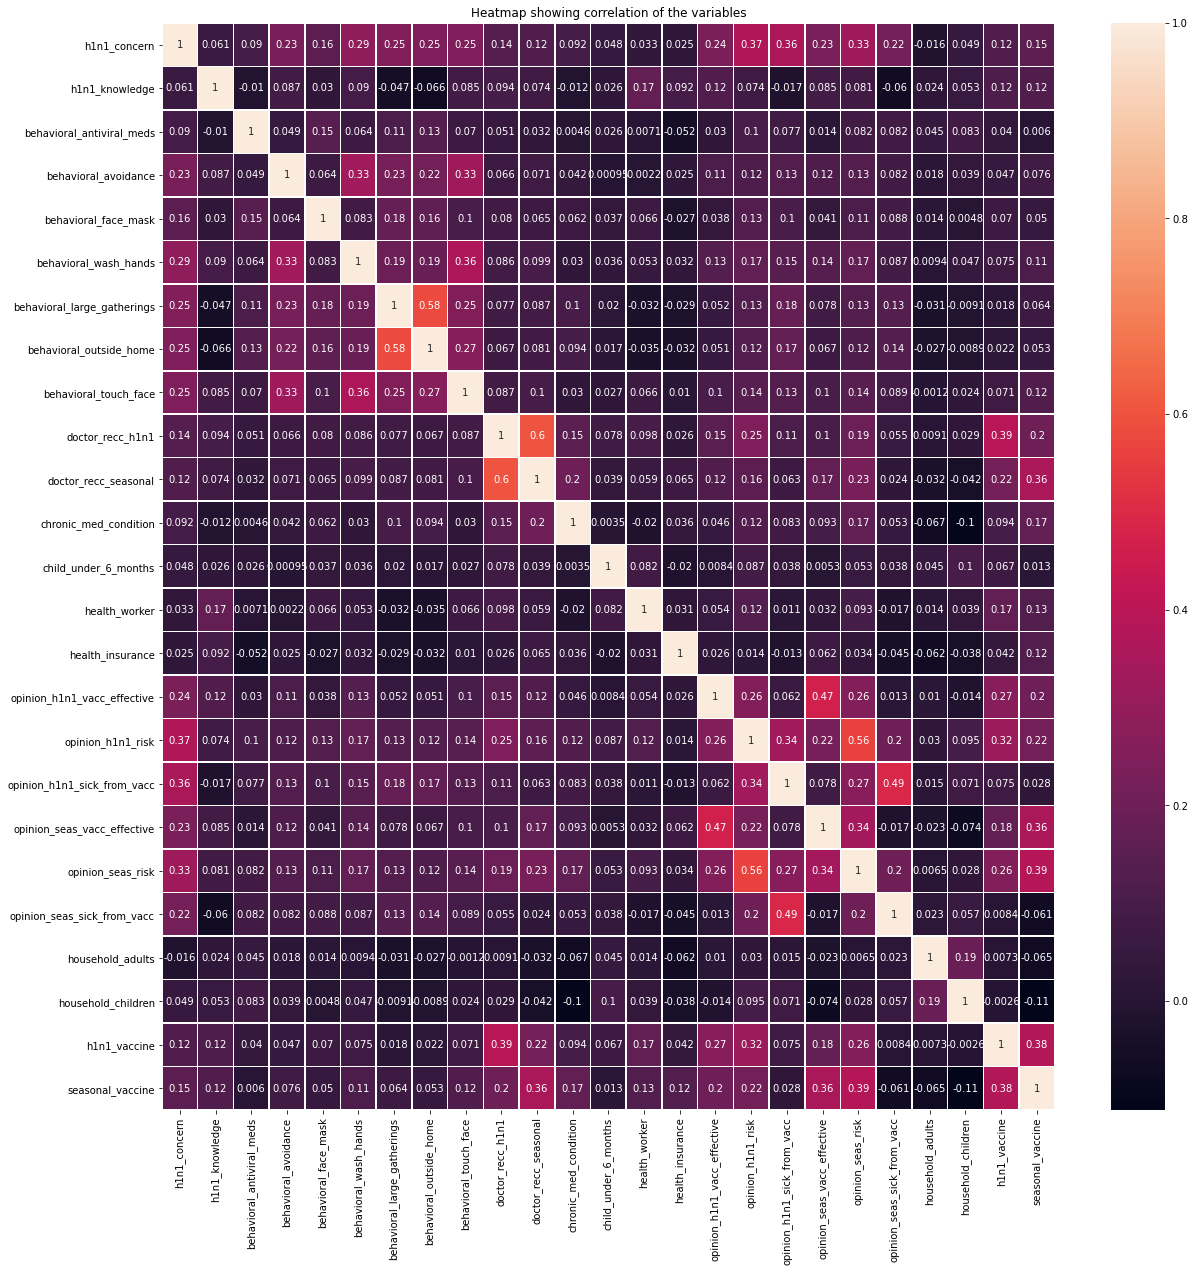

In [220]:
corr =df.corr(method ='pearson') #checking for multicollinearity

plt.figure(figsize = (20,20))
sns.heatmap(corr,linewidth=0.5,annot=True)
plt.title('Heatmap showing correlation of the variables')
plt.show()

As shown from the heatmap, most of the variables have a low positive correlation

Age Correlation: Older individuals show a strong positive correlation with receiving the seasonal vaccine, suggesting they are more likely to get vaccinated.

Chronic Disease: There is a moderate positive correlation between having a chronic disease and getting the seasonal vaccine, indicating that individuals with chronic conditions are more likely to be vaccinated.

Health Workers: A moderately positive correlation exists between health worker status and receiving the seasonal vaccine, implying that health workers are more likely to get vaccinated.

Education and Income: Weak positive correlations with education and income suggest that higher levels of education and income slightly increase the likelihood of vaccination.

## **Factors infuencing seasonal vaccination**

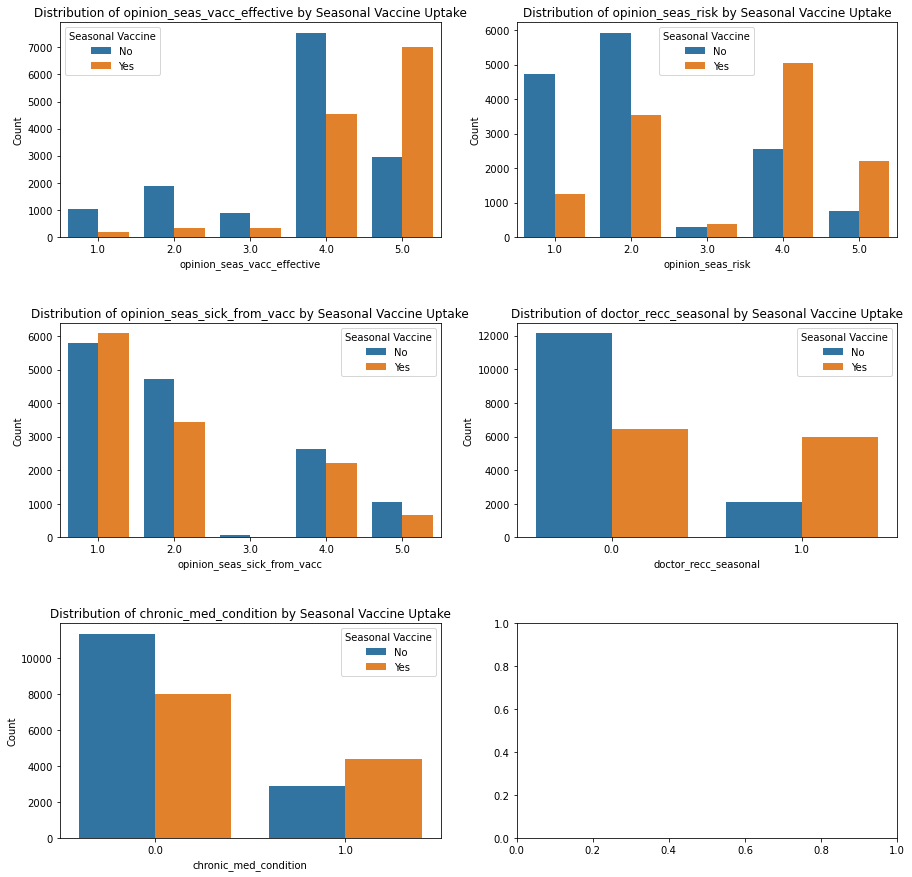

In [221]:

# Columns to plot
y= ["age_group", "race", "sex", "household_adults", "household_children", "marital_status"]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
custom_colors = ["#176B87", "#001C30"]

# Plotting each variable
for idx, col in enumerate(columns_to_plot):
    row_idx = idx // 2
    col_idx = idx % 2
    ax = axes[row_idx, col_idx]
    sns.countplot(data=df, x=col, hue="seasonal_vaccine", ax=ax)
    ax.set_title(f"Distribution of {col} by Seasonal Vaccine Uptake")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.legend(title="Seasonal Vaccine", labels=["No", "Yes"])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Display the plots
plt.show()


**Observations**

Older individuals, particularly those over 65, were more likely to get vaccinated compared to younger age groups.

Vaccination rates were higher among females, married individuals, and people of White descent compared to others in their respective categories.

Households with a single adult and no children had higher vaccination rates than other household compositions.

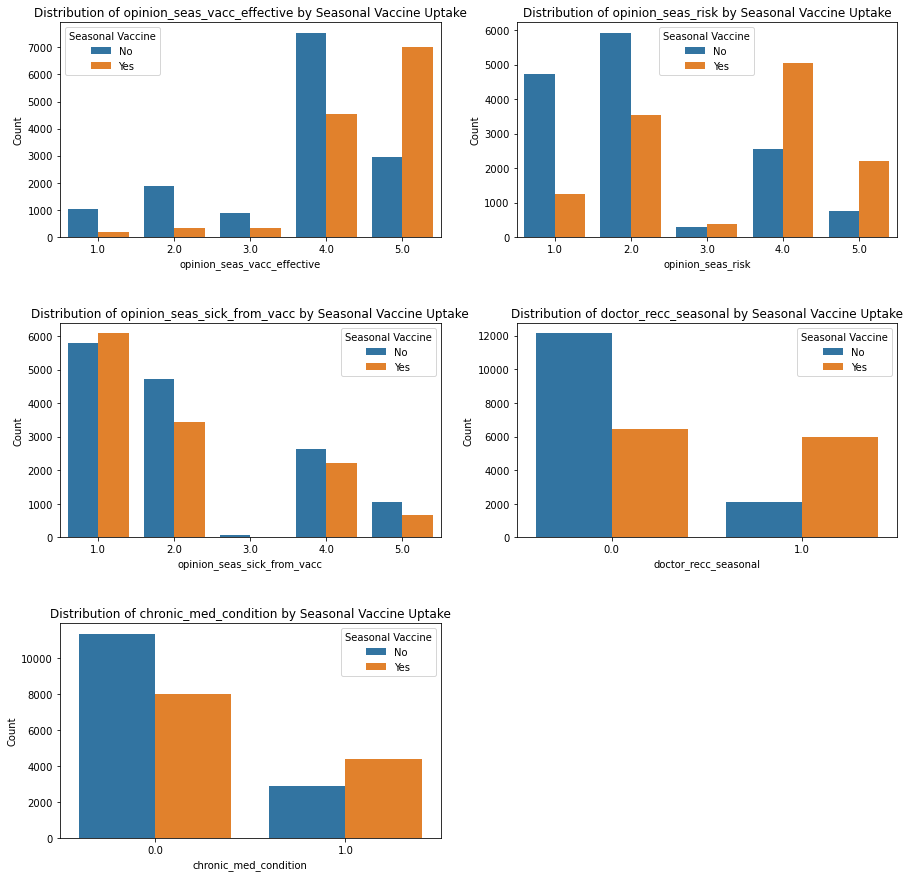

In [222]:
# columns to plot
y = ["opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc",
     "doctor_recc_seasonal", "chronic_med_condition"]

num_plots = len(y)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
custom_palette = ["brown", "pink"]

for i, variable in enumerate(y):
    if i >= num_plots:
        break

    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col]
    sns.countplot(x=variable, hue="seasonal_vaccine", data=df, ax=ax)
    ax.set_title(f"Distribution of {variable} by Seasonal Vaccine Uptake")
    ax.set_xlabel(variable)
    ax.set_ylabel("Count")
    ax.legend(title="Seasonal Vaccine", labels=["No", "Yes"])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Remove any extra blank subplot
if num_plots < num_cols * num_rows:
    fig.delaxes(axes.flatten()[num_plots])

plt.show()

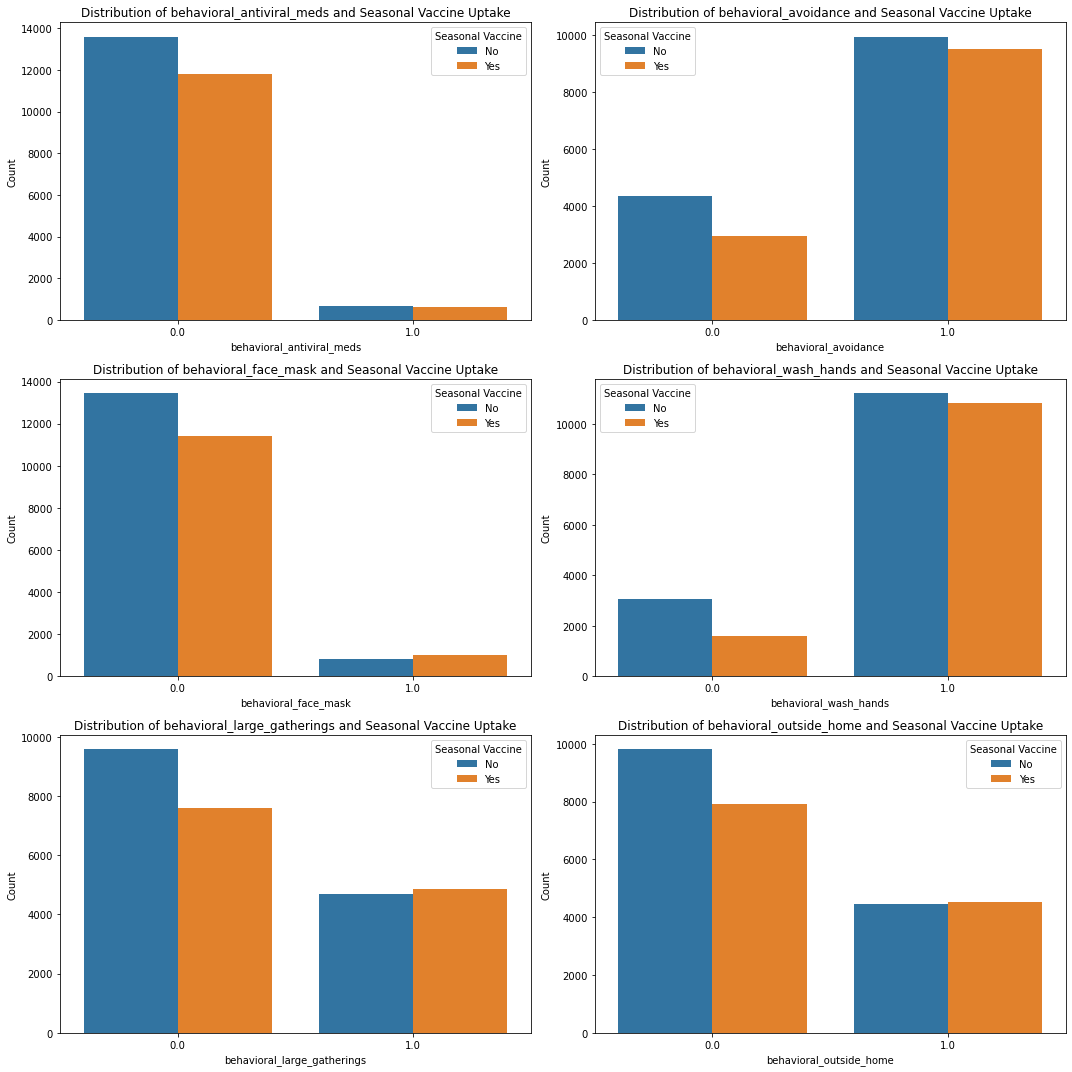

In [223]:
# columns to plot
y = ["behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask",
     "behavioral_wash_hands", "behavioral_large_gatherings", "behavioral_outside_home"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Define custom color palette
custom_palette = ["#454545", "#FF6000"]

for i, variable in enumerate(y):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(x=variable, hue="seasonal_vaccine", data=df, ax=ax)
    ax.set_title(f"Distribution of {variable} and Seasonal Vaccine Uptake")
    ax.set_xlabel(variable)
    ax.set_ylabel("Count")
    ax.legend(title="Seasonal Vaccine", labels=["No", "Yes"])

plt.tight_layout()
plt.show()

# **Preprocessing**

In [224]:
df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [225]:
# Confirm whole dataset is encoded
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_h1n1             26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

In [226]:
from sklearn.preprocessing import OneHotEncoder
encoded_df = df[["age_group", "education", "race", "sex", "marital_status", "rent_or_own", "employment_status",
                           "census_msa", "income_poverty"]]
#using one-encoding to create dummy column
ohe = OneHotEncoder()
data_enc1= ohe.fit_transform(encoded_df)

#converting the finding into dataframe
data_enc1.todense()

#getting feature names
ohe.get_feature_names()

# geting feature names in a dataframe
data_encoded = pd.DataFrame(data_enc1.todense(), columns=ohe.get_feature_names())
data_encoded.head()

,x0_18 - 34 Years,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_12 Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x1_unknown,...,x6_Not in Labor Force,x6_Unemployed,x6_unknown,"x7_MSA, Not Principle City","x7_MSA, Principle City",x7_Non-MSA,"x8_<= $75,000, Above Poverty","x8_> $75,000",x8_Below Poverty,x8_unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [227]:
 df_copy = df.copy() #to avoid overwriting on the main dataset
df_copy.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,unknown,unknown,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,unknown,unknown,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [228]:
columns_to_drop = ["age_group", "education", "race", "sex", "marital_status", "rent_or_own", "employment_status",
                   "census_msa", "income_poverty", "hhs_geo_region", "employment_industry", "employment_occupation"]
df_copy.drop(columns_to_drop, axis=1, inplace=True)
df_copy.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0


In [229]:
new_df = pd.merge(df_copy,data_encoded,left_index=True,right_index=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   h1n1_concern                  26707 non-null  float64
 1   h1n1_knowledge                26707 non-null  float64
 2   behavioral_antiviral_meds     26707 non-null  float64
 3   behavioral_avoidance          26707 non-null  float64
 4   behavioral_face_mask          26707 non-null  float64
 5   behavioral_wash_hands         26707 non-null  float64
 6   behavioral_large_gatherings   26707 non-null  float64
 7   behavioral_outside_home       26707 non-null  float64
 8   behavioral_touch_face         26707 non-null  float64
 9   doctor_recc_h1n1              26707 non-null  float64
 10  doctor_recc_seasonal          26707 non-null  float64
 11  chronic_med_condition         26707 non-null  float64
 12  child_under_6_months          26707 non-null  float64
 13  h

## The Baseline Model

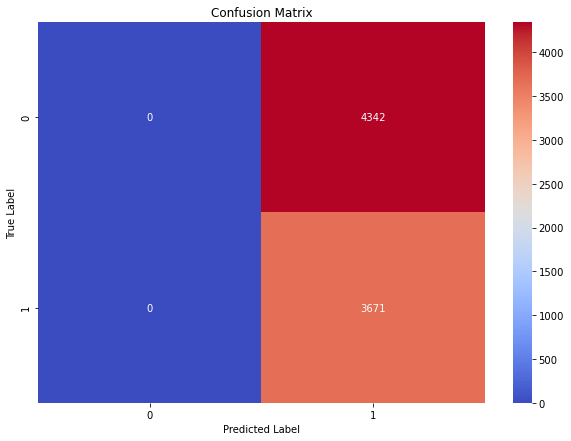

In [230]:

# Splitting features and target variable
features = new_df.drop(columns=["seasonal_vaccine"])
target = new_df["seasonal_vaccine"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a dummy classifier
dummy_clf = DummyClassifier(strategy="constant", constant=1)
dummy_clf.fit(X_train_scaled, y_train)

# Predicting the test set
y_pred = dummy_clf.predict(X_test_scaled)

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Display the plot
plt.show()


In [231]:
# Evaluation of the baseline model

#Accuracy=TP+TN/TP+TN+FP+FN
TP=3671
TN=0
FP=4342
FN=0
baseline_accuracy=(TP+TN)/(TP+FP+TN+FN)
print("Baseline Accuracy: " ,baseline_accuracy)

#precision TP/TP+FP
baseline_precision=(TP/(TP+FP))
print("Baseline Precision: " ,baseline_precision)

baseline_recall=(TP/(TP+FN))
print("Baseline Recall: " ,baseline_recall)

baseline_F1score=(2*baseline_precision* baseline_recall)/(baseline_precision+baseline_recall)
print("Baseline F1score: " ,baseline_F1score)

Baseline Accuracy:  0.4581305378759516
Baseline Precision:  0.4581305378759516
Baseline Recall:  1.0
Baseline F1score:  0.6283806915439919


**Baseline Model Observations**
The baseline accuracy is approximately 45.81%, indicating that the dummy classifier correctly predicts around 45.81% of instances in the test data.

The baseline precision is also 45.81%, which matches the accuracy because the dummy classifier consistently predicts the positive class.

The baseline recall is 100% since the dummy classifier always predicts the positive class, accurately identifying all actual positive instances.

The baseline F1-score is approximately 62.84%, with a higher F1-score indicating a better balance between precision and recall.


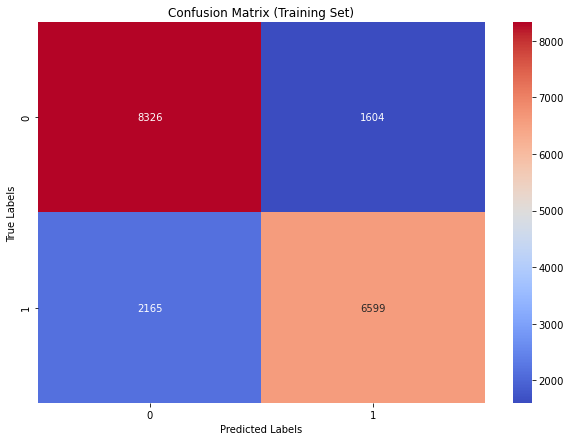

In [232]:

# Initialize the logistic regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model on the scaled training set
log_reg_model.fit(X_train_scaled, y_train)

# Predict the outcomes on the training set
train_predictions = log_reg_model.predict(X_train_scaled)

# Generate the confusion matrix for the training set predictions
conf_matrix_train = confusion_matrix(y_train, train_predictions)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="coolwarm")  # Changed colormap for variety
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Training Set)")

# Display the plot
plt.show()


In [233]:
# cross validate the model using 3 kfolds
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(log_reg_model, X_train_scaled, y_train, cv=3)
print("Cross-Validation Scores:", cv_scores)

average_cv_score = cv_scores.mean()
print("Average Cross-Validation Score:", average_cv_score * 100) # in percentage

Cross-Validation Scores: [0.79412709 0.79682234 0.79955063]
Average Cross-Validation Score: 79.68333532827258


- The scores indicate that the model is approximately 79.68% accurate in its performance.

In [234]:
#evaluation of model
y_pred = log_reg_model.predict(X_test_scaled)
model1_accuracy = accuracy_score(y_test, y_pred)
model1_recall = recall_score(y_test, y_pred)
model1_precision = precision_score(y_test, y_pred)
model1_f1 = f1_score(y_test, y_pred)

print(f"""
Accuracy Fitted Model 1: {model1_accuracy:1.3f}
Recall Fitted Model 1: {model1_recall:1.3f}
Precision Fitted Model 1: {model1_precision:1.3f}
F1 Score Fitted Model 1: {model1_f1:1.3f}
""")


Accuracy Fitted Model 1: 0.807
Recall Fitted Model 1: 0.760
Precision Fitted Model 1: 0.806
F1 Score Fitted Model 1: 0.783



Train AUC Score 0.8738184348862853
Test AUC Score 0.8757021087636349


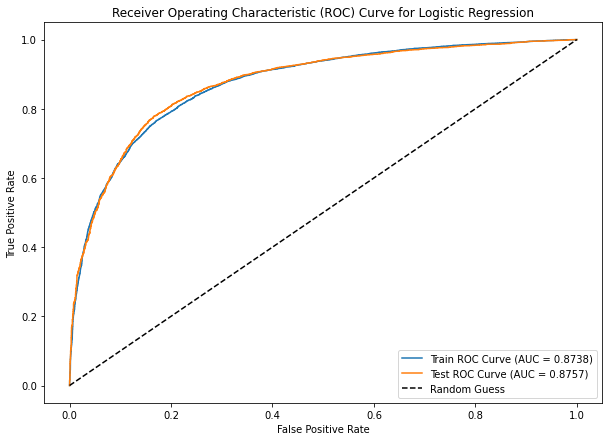

In [235]:
# calcluate ROC

# Obtain the predicted probabilities for the positive class
y_test_prob = log_reg_model.predict_proba(X_test_scaled)[:, 1]
y_train_prob = log_reg_model.predict_proba(X_train_scaled)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
train_fpr_l, train_tpr_l, thresholds = roc_curve(y_train, y_train_prob)
test_fpr_l, test_tpr_l, thresholds = roc_curve(y_test, y_test_prob)

# Calculate the AUC score
auc_score_model1_train = roc_auc_score(y_train, y_train_prob)
auc_score_model1_test = roc_auc_score(y_test, y_test_prob)

print("Train AUC Score", auc_score_model1_train)
print("Test AUC Score", auc_score_model1_test)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(train_fpr_l, train_tpr_l, label="Train ROC Curve (AUC = {:.4f})".format(auc_score_model1_train))
plt.plot(test_fpr_l, test_tpr_l, label="Test ROC Curve (AUC = {:.4f})".format(auc_score_model1_test))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for Logistic Regression")
plt.legend(loc="lower right")

plt.show()

**Logistic Regression Observations**

- An **accuracy** of 0.807 means that the model is correctly predicting the seasonal vaccine outcome for around 80-81%% of the samples in the test data.
- A **recall** of 0.760 indicates that the model is able to correctly identify around 76% of the positive instances (those who received the flu vaccine) in the test data.
- A **precision** of 0.806 implies that around 80% of the instances predicted as positive by the model are actually true positives.
- The **F1 score** combines both precision and recall into a single metric. With an F1 score of 0.783, it suggests a balanced performance between precision and recall.
These metrics are a good indication that the logistic regression model is providing reasonably accurate predictions on the uptake of the seasonal flu vaccine.

The **ROC curve** above shows a AUC score of 0.8757 on the test set, revealing that the model is quite good on distinguishing between those who received the seasonal flu vaccine or not (positives and negatives).
- The score is close to 1, meaning that the predictive power of the  model can be trusted.

## Second Model : Decision Trees

Text(0.5, 1.0, 'Confusion Matrix (Training Set)')

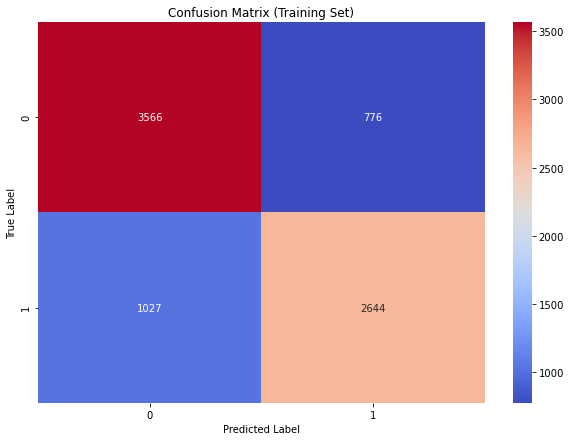

In [236]:
# Test set predictions
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# instantiate
model2 = DecisionTreeClassifier(criterion="gini", max_depth=5)

# fit the model on train data
model2.fit(X_train_scaled, y_train)

y_pred2 = model2.predict(X_test_scaled)

# Plot confusion matrix
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_test, y_pred2)

sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Training Set)")

In [237]:
#evaluation of model
y_pred = model2.predict(X_test_scaled)
model2_accuracy = accuracy_score(y_test, y_pred)
model2_recall = recall_score(y_test, y_pred)
model2_precision = precision_score(y_test, y_pred)
model2_f1 = f1_score(y_test, y_pred)

print(f"""
Accuracy Fitted Model: {model2_accuracy:1.3f}
Recall Fitted Model: {model2_recall:1.3f}
Precision Fitted Model: {model2_precision:1.3f}
F1 Score Fitted Model: {model2_f1:1.3f}
""")


Accuracy Fitted Model: 0.775
Recall Fitted Model: 0.720
Precision Fitted Model: 0.773
F1 Score Fitted Model: 0.746



Train AUC Score 0.8526271646849719
Test AUC Score 0.8489843647365705


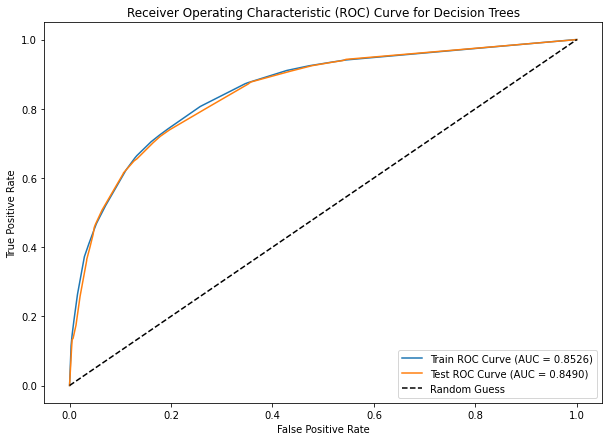

In [238]:
# ROC and AUC
# calcluate ROC

# Obtain the predicted probabilities for the positive class
y_test_pred = model2.predict_proba(X_test_scaled)[:, 1]
y_train_pred = model2.predict_proba(X_train_scaled)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
training_fpr_d, training_tpr_d, _  = roc_curve(y_train, y_train_pred)
test_fpr_d, test_tpr_d, _  = roc_curve(y_test, y_test_pred)

# Calculate the AUC score
auc_score_model2_test = roc_auc_score(y_test, y_test_pred)
auc_score_model2_train = roc_auc_score(y_train, y_train_pred)

print("Train AUC Score", auc_score_model2_train)
print("Test AUC Score", auc_score_model2_test)

# Plot the ROC curve
plt.figure(figsize=(10,7))
plt.plot(training_fpr_d, training_tpr_d, label="Train ROC Curve (AUC = {:.4f})".format(auc_score_model2_train))
plt.plot(test_fpr_d, test_tpr_d, label="Test ROC Curve (AUC = {:.4f})".format(auc_score_model2_test))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for Decision Trees")
plt.legend(loc="lower right")
plt.show()

**Decision Trees Observations**

- **Accuracy**: overall, accuracy stands at approximately 0.78, indicating that around 76% of samples are correctly predicted.
- **Recall** shows that about 72% of those who received the vaccine were identified.
- **Precision** indicates the model got 77.3% in prediciting vaccine recipients as actual recipients.
- **F1-Score**of 74.6% represents precision and recall in a balanced way.

As per the **ROC curve**, this model has AUC of 0.848, which is slightly lower than the Logistic Regression model. It is still a commendable performance of predicting positives as positives and negatives as negatives.

## Third Model : Random Forest

In [239]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForest model
model3 = RandomForestClassifier(random_state=42)

# Define a simpler hyperparameter grid (with fewer values)
param_grid = {
    "n_estimators": [100, 200],  # Fewer n_estimators
    "max_depth": [None, 5]        # Fewer max_depth options
}

# Perform grid search with fewer cross-validation folds (e.g., cv=3)
grid_search = GridSearchCV(model3, param_grid, cv=3, n_jobs=-1)  # n_jobs=-1 uses all CPU cores
grid_search.fit(X_train_scaled, y_train)

# Get the best model and fit it on the scaled data
best_model3 = grid_search.best_estimator_
best_model3.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

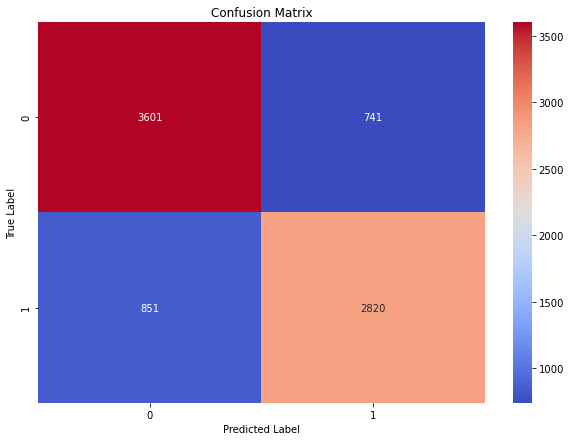

In [240]:
y_pred3 = best_model3.predict(X_test_scaled)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred3)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [241]:
#evaluation of model
y_pred = best_model3.predict(X_test_scaled)
model3_accuracy = accuracy_score(y_test, y_pred)
model3_recall = recall_score(y_test, y_pred)
model3_precision = precision_score(y_test, y_pred)
model3_f1 = f1_score(y_test, y_pred)

print(f"""
Accuracy Fitted Model: {model3_accuracy:1.3f}
Recall Fitted Model: {model3_recall:1.3f}
Precision Fitted Model: {model3_precision:1.3f}
F1 Score Fitted Model: {model3_f1:1.3f}
""")


Accuracy Fitted Model: 0.801
Recall Fitted Model: 0.768
Precision Fitted Model: 0.792
F1 Score Fitted Model: 0.780



Train AUC Score: 1.0000
Test AUC Score: 0.8741


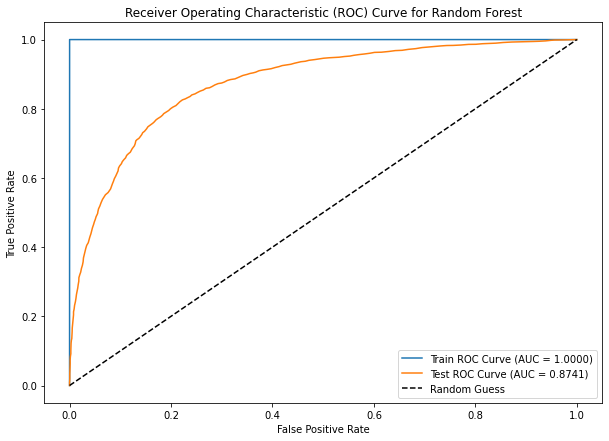

In [242]:
# Predict on training and test sets
training_preds3 = best_model3.predict_proba(X_train_scaled)[:, 1]
test_preds3 = best_model3.predict_proba(X_test_scaled)[:, 1]

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds for ROC curve
training_fpr_r, training_tpr_r, _ = roc_curve(y_train, training_preds3)
test_fpr_r, test_tpr_r, _ = roc_curve(y_test, test_preds3)

# Calculate the AUC score
training_auc_model3 = roc_auc_score(y_train, training_preds3)
test_auc_model3 = roc_auc_score(y_test, test_preds3)
print("Train AUC Score: {:.4f}". format(training_auc_model3))
print("Test AUC Score: {:.4f}".format(test_auc_model3))

# Plot the ROC curve
plt.figure(figsize=(10,7))
plt.plot(training_fpr_r, training_tpr_r, label="Train ROC Curve (AUC = {:.4f})".format(training_auc_model3))
plt.plot(test_fpr_r, test_tpr_r, label="Test ROC Curve (AUC = {:.4f})".format(test_auc_model3))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for Random Forest")
plt.legend(loc="lower right")
plt.show()

**Random Forest Observations**

Accuracy Fitted Model: 0.801
Recall Fitted Model: 0.768
Precision Fitted Model: 0.792
F1 Score Fitted Model: 0.780
- **Accuracy**: the model correctly predicted vaccine uptake with a score of 80.1%.
- **Recall**: 76.8% of actual vaccine recipients were correctly identified.  
- **Precision**: 79.2% of those predicted to have taken the vaccine actually took the vaccine.
- **F1-Score**: at 78%, it is a good balance between precision and recall.

This model's **ROC curve** shows AUC of 0.8741, the highest so far. The model is more effective in predicting the seasonal vaccine uptake based on the provided features.It is able to differentiate between vaccine recipients and non-recipients effectively.

# **Model Evaluation Summary**

- The **Random Forest Model** (best_model3) has demonstrated commendable performance in predicting the uptake of the seasonal flu vaccine. It has strong evaluation metrics and an ROC curve with strong discriminatory power.

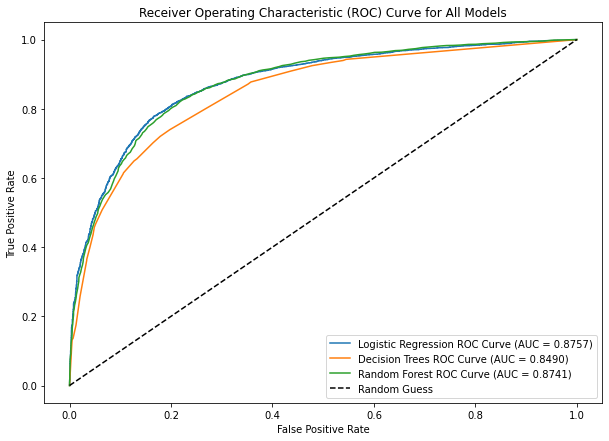

In [243]:
plt.figure(figsize=(10,7))
plt.plot(test_fpr_l, test_tpr_l, label="Logistic Regression ROC Curve (AUC = {:.4f})".format(auc_score_model1_test))
plt.plot(test_fpr_d, test_tpr_d, label="Decision Trees ROC Curve (AUC = {:.4f})".format(auc_score_model2_test))
plt.plot(test_fpr_r, test_tpr_r, label="Random Forest ROC Curve (AUC = {:.4f})".format(test_auc_model3))

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for All Models")
plt.legend(loc="lower right")

plt.show()

# **Conclusion**

## **The Data**
- The data required a lot of exploration and engineering. Some important features had missing values that would have made the data biased. Other features showed a bias, such as the race feature that was heavily tilted towards the white race.

## **The Models**
- The models' performance was almost similar. However, with each iteration, the scores and accuracies changed. **Random Forest** emerged the best with an AUC score of 0.8539 on the test data.
- The process of choosing and optimizing model hyperparameters was time consuming.
- A better balance on the data may give more promising results.

**In summary:**
- The role of healthcare professionals can never be downplayed as evidenced by the fact that a doctor's recommendation to get the flu vaccine played a big role.
- Public perception is also important. How people view and feel about vaccines is a big influence on vaccine uptake.
- Age is also a factor. Older people tended to get the seasonal flue vaccine more than younger people.

# **Recommendations**
Ensure flu vaccines are fully covered under insurance plans with no extra costs for policyholders, including the vaccine and administration fees.

Use customer data to personalize communication and design tailored campaigns through channels like social media, email, and direct mail to encourage vaccination.

Partner with healthcare providers, pharmacies, and mobile clinics to offer convenient locations for flu vaccinations, making it easier for policyholders to get vaccinated.

Offer rewards like lower premiums or wellness points to motivate policyholders to get vaccinated.

Include flu vaccination in existing wellness programs, offering support and incentives for policyholders to stay on track with preventive health measures.

